In [1]:
import pandas as pd
import numpy as np
from tensorflow.keras import layers, models


2023-03-26 20:35:31.098112: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-26 20:35:31.294716: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-03-26 20:35:31.294744: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-03-26 20:35:31.332587: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-03-26 20:35:32.083339: W tensorflow/stream_executor/platform/de

In [2]:
def get_two_layers_nnet():
    """ prepare two layers neural net """
    model = models.Sequential()
    model.add(layers.Dense(34, activation="tanh", input_shape=(34,)))
    model.add(layers.Dropout(0.1))
    model.add(layers.Dense(12, activation="tanh"))
    model.add(layers.Dense(1))
    model.compile(optimizer="adam", loss="mse", metrics=["mae"])
    return model



In [3]:
def prepare_data(csv_file="../data/sunspot_numbers.csv",
                 lag_start=1,
                 lag_end=26):
    """ """
    data = pd.read_csv(csv_file, delimiter=";")
    fields = []
    # lags of series
    for i in range(lag_start, (lag_end + 1)):
        data[f"lag_{i}"] = data.sunspots.shift(i).fillna(0.)
        fields.append(f"lag_{i}")
    final_lag = 12
    for i in range(64, 514, 64):
        data[f"lag_{i}"] = data.sunspots.shift(i).fillna(0.)
        fields.append(f"lag_{i}")
    print(len(fields))
    return data, fields


In [4]:
df, lags = prepare_data(csv_file="../data/sunspot_numbers.csv")
model = get_two_layers_nnet()

np.random.seed(222)

n = len(df["sunspots"].values)
nums = np.array(np.arange(n))
np.random.shuffle(nums)
rands = nums[72:].tolist()
X = df[lags].values[rands]
y = df["sunspots"].values[rands]
X_test = df[lags].values[nums[:72]]
y_test = df["sunspots"].values[nums[:72]]
mean = df[lags].values.mean(axis=0)
std = df[lags].values.std(axis=0)
X = (X - mean) / std
X_test = (X_test - mean) / std

history = model.fit(X, y, epochs = 600, batch_size = 64,
                    validation_data=(X_test, y_test))

34
Epoch 1/600


2023-03-26 20:35:34.740155: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-03-26 20:35:34.740220: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2023-03-26 20:35:34.740268: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PDC003): /proc/driver/nvidia/version does not exist
2023-03-26 20:35:34.740698: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


51/51 [==============================] - 1s 6ms/step - loss: 11151.0684 - mae: 81.8342 - val_loss: 9501.5273 - val_mae: 72.7618
Epoch 2/600
51/51 [==============================] - 0s 3ms/step - loss: 10904.6445 - mae: 81.7885 - val_loss: 9402.2344 - val_mae: 72.7813
Epoch 3/600
51/51 [==============================] - 0s 3ms/step - loss: 10746.3564 - mae: 81.2682 - val_loss: 9260.1230 - val_mae: 71.9342
Epoch 4/600
51/51 [==============================] - 0s 3ms/step - loss: 10534.3936 - mae: 79.5700 - val_loss: 8980.8271 - val_mae: 68.9431
Epoch 5/600
51/51 [==============================] - 0s 3ms/step - loss: 10248.6367 - mae: 76.6998 - val_loss: 8732.0488 - val_mae: 66.4751
Epoch 6/600
51/51 [==============================] - 0s 3ms/step - loss: 10023.1367 - mae: 74.9763 - val_loss: 8576.3906 - val_mae: 65.4332
Epoch 7/600
51/51 [==============================] - 0s 3ms/step - loss: 9866.7529 - mae: 73.9890 - val_loss: 8457.3477 - val_mae: 64.7261
Epoch 8/600
51/51 [==============

51/51 [==============================] - 0s 3ms/step - loss: 5947.5464 - mae: 51.9565 - val_loss: 5110.0312 - val_mae: 45.5515
Epoch 60/600
51/51 [==============================] - 0s 3ms/step - loss: 5891.5542 - mae: 51.6220 - val_loss: 5046.4141 - val_mae: 44.4985
Epoch 61/600
51/51 [==============================] - 0s 3ms/step - loss: 5836.2334 - mae: 51.2258 - val_loss: 5000.7920 - val_mae: 44.1608
Epoch 62/600
51/51 [==============================] - 0s 3ms/step - loss: 5782.6533 - mae: 50.9555 - val_loss: 4946.7715 - val_mae: 43.6044
Epoch 63/600
51/51 [==============================] - 0s 3ms/step - loss: 5731.2969 - mae: 50.6288 - val_loss: 4905.7363 - val_mae: 43.4944
Epoch 64/600
51/51 [==============================] - 0s 3ms/step - loss: 5677.7827 - mae: 50.3434 - val_loss: 4870.1851 - val_mae: 43.6507
Epoch 65/600
51/51 [==============================] - 0s 3ms/step - loss: 5625.7866 - mae: 49.9901 - val_loss: 4824.6040 - val_mae: 43.3584
Epoch 66/600
51/51 [=============

51/51 [==============================] - 0s 5ms/step - loss: 3479.5293 - mae: 36.6230 - val_loss: 3068.3372 - val_mae: 31.9735
Epoch 118/600
51/51 [==============================] - 0s 3ms/step - loss: 3449.3103 - mae: 36.4400 - val_loss: 3037.7148 - val_mae: 31.9906
Epoch 119/600
51/51 [==============================] - 0s 3ms/step - loss: 3414.1199 - mae: 36.1858 - val_loss: 3027.3572 - val_mae: 32.1624
Epoch 120/600
51/51 [==============================] - 0s 3ms/step - loss: 3386.8528 - mae: 36.0133 - val_loss: 2990.6396 - val_mae: 31.6680
Epoch 121/600
51/51 [==============================] - 0s 3ms/step - loss: 3353.7903 - mae: 35.8717 - val_loss: 2968.6870 - val_mae: 31.2929
Epoch 122/600
51/51 [==============================] - 0s 3ms/step - loss: 3325.0969 - mae: 35.6890 - val_loss: 2946.6638 - val_mae: 31.1560
Epoch 123/600
51/51 [==============================] - 0s 3ms/step - loss: 3296.3120 - mae: 35.4969 - val_loss: 2936.4141 - val_mae: 31.6664
Epoch 124/600
51/51 [======

51/51 [==============================] - 0s 3ms/step - loss: 2077.2812 - mae: 27.8456 - val_loss: 1947.5491 - val_mae: 25.3583
Epoch 176/600
51/51 [==============================] - 0s 3ms/step - loss: 2061.2297 - mae: 27.7376 - val_loss: 1943.3173 - val_mae: 25.9164
Epoch 177/600
51/51 [==============================] - 0s 3ms/step - loss: 2041.7782 - mae: 27.5811 - val_loss: 1922.4341 - val_mae: 25.3573
Epoch 178/600
51/51 [==============================] - 0s 3ms/step - loss: 2027.8303 - mae: 27.5369 - val_loss: 1911.0391 - val_mae: 25.4142
Epoch 179/600
51/51 [==============================] - 0s 3ms/step - loss: 2007.1542 - mae: 27.3631 - val_loss: 1904.1675 - val_mae: 25.4569
Epoch 180/600
51/51 [==============================] - 0s 3ms/step - loss: 1994.6577 - mae: 27.3087 - val_loss: 1894.2207 - val_mae: 25.8114
Epoch 181/600
51/51 [==============================] - 0s 3ms/step - loss: 1971.8207 - mae: 27.1573 - val_loss: 1870.9612 - val_mae: 25.3091
Epoch 182/600
51/51 [======

51/51 [==============================] - 0s 4ms/step - loss: 1284.7738 - mae: 22.3707 - val_loss: 1225.4801 - val_mae: 21.2608
Epoch 234/600
51/51 [==============================] - 0s 4ms/step - loss: 1279.2308 - mae: 22.3739 - val_loss: 1217.3530 - val_mae: 21.3530
Epoch 235/600
51/51 [==============================] - 0s 3ms/step - loss: 1265.9736 - mae: 22.2119 - val_loss: 1212.6284 - val_mae: 21.4300
Epoch 236/600
51/51 [==============================] - 0s 3ms/step - loss: 1256.3000 - mae: 22.1751 - val_loss: 1194.5165 - val_mae: 20.8935
Epoch 237/600
51/51 [==============================] - 0s 3ms/step - loss: 1249.7151 - mae: 22.1852 - val_loss: 1172.7692 - val_mae: 20.5772
Epoch 238/600
51/51 [==============================] - 0s 3ms/step - loss: 1244.7417 - mae: 22.1470 - val_loss: 1188.7340 - val_mae: 21.0864
Epoch 239/600
51/51 [==============================] - 0s 3ms/step - loss: 1219.8550 - mae: 21.8327 - val_loss: 1163.2788 - val_mae: 20.7421
Epoch 240/600
51/51 [======

51/51 [==============================] - 0s 3ms/step - loss: 875.3696 - mae: 19.3694 - val_loss: 794.0320 - val_mae: 18.3021
Epoch 292/600
51/51 [==============================] - 0s 4ms/step - loss: 865.5943 - mae: 19.2700 - val_loss: 787.0201 - val_mae: 18.4718
Epoch 293/600
51/51 [==============================] - 0s 3ms/step - loss: 861.9133 - mae: 19.2982 - val_loss: 786.1194 - val_mae: 18.6084
Epoch 294/600
51/51 [==============================] - 0s 3ms/step - loss: 859.2347 - mae: 19.2270 - val_loss: 771.9440 - val_mae: 18.2404
Epoch 295/600
51/51 [==============================] - 0s 3ms/step - loss: 854.0353 - mae: 19.2028 - val_loss: 776.3245 - val_mae: 18.0312
Epoch 296/600
51/51 [==============================] - 0s 4ms/step - loss: 849.3718 - mae: 19.2059 - val_loss: 777.3440 - val_mae: 18.2957
Epoch 297/600
51/51 [==============================] - 0s 4ms/step - loss: 835.0934 - mae: 19.0442 - val_loss: 758.3140 - val_mae: 17.9107
Epoch 298/600
51/51 [====================

51/51 [==============================] - 0s 3ms/step - loss: 671.7791 - mae: 17.6491 - val_loss: 582.8484 - val_mae: 17.1588
Epoch 351/600
51/51 [==============================] - 0s 3ms/step - loss: 669.2872 - mae: 17.6797 - val_loss: 564.8387 - val_mae: 16.8153
Epoch 352/600
51/51 [==============================] - 0s 3ms/step - loss: 666.4298 - mae: 17.5683 - val_loss: 564.9222 - val_mae: 16.7486
Epoch 353/600
51/51 [==============================] - 0s 3ms/step - loss: 659.5734 - mae: 17.5862 - val_loss: 560.5472 - val_mae: 16.7214
Epoch 354/600
51/51 [==============================] - 0s 3ms/step - loss: 645.1190 - mae: 17.3694 - val_loss: 565.0969 - val_mae: 16.9616
Epoch 355/600
51/51 [==============================] - 0s 3ms/step - loss: 649.8757 - mae: 17.4384 - val_loss: 547.1163 - val_mae: 16.4734
Epoch 356/600
51/51 [==============================] - 0s 3ms/step - loss: 659.3943 - mae: 17.4732 - val_loss: 569.4424 - val_mae: 17.0093
Epoch 357/600
51/51 [====================

51/51 [==============================] - 0s 3ms/step - loss: 576.3653 - mae: 16.8380 - val_loss: 466.1999 - val_mae: 16.1416
Epoch 410/600
51/51 [==============================] - 0s 3ms/step - loss: 572.9535 - mae: 16.8096 - val_loss: 452.2578 - val_mae: 15.9543
Epoch 411/600
51/51 [==============================] - 0s 3ms/step - loss: 575.9446 - mae: 16.8778 - val_loss: 452.1720 - val_mae: 15.7467
Epoch 412/600
51/51 [==============================] - 0s 3ms/step - loss: 581.1817 - mae: 16.9994 - val_loss: 457.3926 - val_mae: 16.0240
Epoch 413/600
51/51 [==============================] - 0s 3ms/step - loss: 578.0849 - mae: 16.8680 - val_loss: 462.2677 - val_mae: 15.9834
Epoch 414/600
51/51 [==============================] - 0s 3ms/step - loss: 570.3857 - mae: 16.8580 - val_loss: 450.5360 - val_mae: 15.8320
Epoch 415/600
51/51 [==============================] - 0s 3ms/step - loss: 577.2267 - mae: 16.9755 - val_loss: 449.4535 - val_mae: 15.8273
Epoch 416/600
51/51 [====================

51/51 [==============================] - 0s 4ms/step - loss: 528.3422 - mae: 16.4349 - val_loss: 402.8174 - val_mae: 15.4013
Epoch 469/600
51/51 [==============================] - 0s 3ms/step - loss: 525.5096 - mae: 16.3577 - val_loss: 392.8141 - val_mae: 15.2026
Epoch 470/600
51/51 [==============================] - 0s 3ms/step - loss: 526.7071 - mae: 16.2949 - val_loss: 398.0045 - val_mae: 15.2899
Epoch 471/600
51/51 [==============================] - 0s 3ms/step - loss: 529.1061 - mae: 16.3565 - val_loss: 388.9741 - val_mae: 15.1243
Epoch 472/600
51/51 [==============================] - 0s 3ms/step - loss: 525.3116 - mae: 16.2898 - val_loss: 387.9287 - val_mae: 15.0427
Epoch 473/600
51/51 [==============================] - 0s 3ms/step - loss: 529.5862 - mae: 16.3614 - val_loss: 386.2251 - val_mae: 15.1358
Epoch 474/600
51/51 [==============================] - 0s 3ms/step - loss: 530.5632 - mae: 16.4236 - val_loss: 393.2321 - val_mae: 15.2670
Epoch 475/600
51/51 [====================

51/51 [==============================] - 0s 4ms/step - loss: 480.7478 - mae: 15.6996 - val_loss: 414.6874 - val_mae: 15.8939
Epoch 528/600
51/51 [==============================] - 0s 3ms/step - loss: 489.7466 - mae: 15.8475 - val_loss: 415.2817 - val_mae: 15.8957
Epoch 529/600
51/51 [==============================] - 0s 3ms/step - loss: 490.6688 - mae: 15.8579 - val_loss: 408.3127 - val_mae: 15.7806
Epoch 530/600
51/51 [==============================] - 0s 3ms/step - loss: 501.6238 - mae: 15.9598 - val_loss: 400.4325 - val_mae: 15.5736
Epoch 531/600
51/51 [==============================] - 0s 3ms/step - loss: 488.9199 - mae: 15.8215 - val_loss: 399.7897 - val_mae: 15.6249
Epoch 532/600
51/51 [==============================] - 0s 3ms/step - loss: 502.5836 - mae: 16.0407 - val_loss: 398.7263 - val_mae: 15.6993
Epoch 533/600
51/51 [==============================] - 0s 3ms/step - loss: 498.2880 - mae: 15.9208 - val_loss: 401.1095 - val_mae: 15.5997
Epoch 534/600
51/51 [====================

51/51 [==============================] - 0s 3ms/step - loss: 467.5766 - mae: 15.5972 - val_loss: 410.0533 - val_mae: 15.6981
Epoch 587/600
51/51 [==============================] - 0s 3ms/step - loss: 473.6653 - mae: 15.6312 - val_loss: 400.4377 - val_mae: 15.4147
Epoch 588/600
51/51 [==============================] - 0s 3ms/step - loss: 468.1560 - mae: 15.6663 - val_loss: 422.8811 - val_mae: 16.0262
Epoch 589/600
51/51 [==============================] - 0s 3ms/step - loss: 466.3721 - mae: 15.5080 - val_loss: 410.9769 - val_mae: 15.6512
Epoch 590/600
51/51 [==============================] - 0s 3ms/step - loss: 463.9134 - mae: 15.5356 - val_loss: 412.7494 - val_mae: 15.8000
Epoch 591/600
51/51 [==============================] - 0s 3ms/step - loss: 465.2906 - mae: 15.5631 - val_loss: 419.2600 - val_mae: 15.7724
Epoch 592/600
51/51 [==============================] - 0s 3ms/step - loss: 467.8796 - mae: 15.5553 - val_loss: 424.9900 - val_mae: 15.8903
Epoch 593/600
51/51 [====================

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

model.evaluate(X_test, y_test)
x_avg = (df[lags].values - mean) / std
predict = model.predict(x_avg)

103/103 [==============================] - 0s 1ms/step


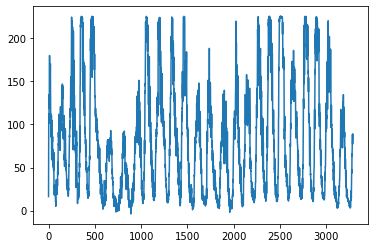

In [7]:
plt.plot(predict)
plt.show()

103/103 [==============================] - 0s 1ms/step


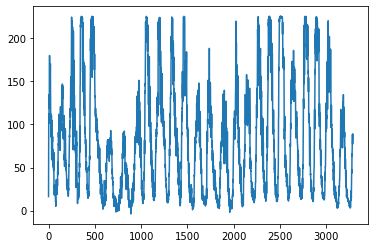

In [8]:
from matplotlib import pyplot as plt
%matplotlib inline

model.evaluate(X_test, y_test)
x_avg = (df[lags].values - mean) / std
predict = model.predict(x_avg)

plt.plot(predict)
plt.show()

In [9]:
model.evaluate(x_avg, df["sunspots"].values)

103/103 [==============================] - 0s 2ms/step - loss: 399.0758 - mae: 14.2990


[399.0758056640625, 14.299007415771484]

In [12]:
model.save("two_layer_dnn.h5")

In [13]:
print(np.max(predict), np.max(df["sunspots"].values))

225.5434 398.2
